# Introducción

## Objetivo general
El proyecto consiste en predecir la deserción de estudiantes en el contexto una plataforma educativa online de código libre argentina que presenta una secuencia didáctica para aprender a programar. Para ello se utilizará un dataset anonimizado de aproximadamente 50.000 filas con progreso de estudiantes consistente en sus interacciones con la plataforma de aproximadamente 150 estudiantes. El mismo contiene tanto datos estructurados como no estructurados: tipos de eventos, fechas, transiciones entre estados, código fuente de soluciones enviadas, resultados de análisis sobre los árboles sintacticos y la ejecución del código fuente, entre otros.

## Primera entrega: análisis y visualización

## Hitos

La intención es avanzar de forma iterativa e incremental, en cuatro iteraciones: 

1. **Familiarización y planteo de preguntas** (📅 semana del 10 de Mayo) Conoceremos el problema, caracterizaremos a muy alto nivel el dataset y  partiendo de la pregunta _¿qué factores inciden en la deserción?_ se deberá:
    1. producir nuevas preguntas, más específicas, que ayuden a responder a la pregunta general;
    2. proponer a alto nivel (no es necesario en este punto código, aunque siempre suma) estrategias para resolverlas;
    3. identificar, si fuera necesario, qué información falta para responder dichas preguntas
2. **Caracterización y visualización I** (📅 semana del 17 de Mayo). Intentaremos dar respuesta a las preguntas de la iteración anterior a través de métricas estadísticas y visualizaciones. Plantearemos nuevas preguntas y refinaremos las anteriores
3. **Caracterización y visualización II** (📅 semana del 24 de Mayo). Continuaremos iterando sobre las preguntas, métricas estadísticas y visualizaciones. **Este hito será opcional y en función del detalle alcanzado en el anterior**.  
4. **Entrega final** (📅 semana del 31 de Mayo)

## Los datos

Cada fila de este datasets representa el envío de una solución a un ejercicio realizada por un@ estudiante y los resultados de la evaluación automática realizada por la plataforma [Mumuki](https://mumuki.io). Encontraremos las siguientes columnas: 

  * `exercise_name` y `exercise_eid`: nombre e identificador del ejercicio dentro de una guía 
  * `expectation_results`: resultados del análisis de expectativas y code smells realizado mediante  la herramienta mulang
  * `guide_slug`: identificador único de la guía, que permite buscarle como un repositorio Github o dentro del API de contenido de Mumuki (por ejemplo la guía `mumukiproject/mumuki-guia-python-funciones-tipos-de-datos` se corresponde con la URL https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos). Junto con el exercise_id constituyen la clave natural primaria del ejercicio. 
  * `result`: resutlado obtenido al intentar cargar la solución en un intérprete de Python. Sólo está presente en caso de que la solución no se haya podido cargar satisfactoriamiente debido a errores de sintaxis o referencias. Si la solución ha sido cargada correctamente, se deberá inspeccionar el campo `test_results`
  * `sid`: identificador único del envío, o -1 si lo que se envío fue una prueba a través del REPL de Mumuki (consola) en lugar de una solución
  * `student_uid`: identificador (anonimizado) de estudiante
  * `submission_content`: código fuente de la solución enviada
  * `submission_created_at`: fecha y hora GMT a la que la solución fue enviada
  * `submission_status`: estado del envío: passed (solución correcta), passed_with_warnigns (solución correcta desde el punto de vista de las pruebas unitarias pero con errores de mulang), failed (solución que no pasa las pruebas unitarias), errored (solución que no puede ser cargada por errores de sintaxis o referencias), aborted (solución que puede ser cargada pero no puede ser ejecutada de forma completa)
  * `submissions_count`: cantidad de soluciones enviadas hasta el momento para es@ estudiante y ejercicio
  * `test_results`: resultados de las pruebas unitarias, en caso de que hayan podido ser ejecutadas

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
import datetime as dt
from IPython.display import HTML, display
import math

seaborn.set_context('talk')



In [2]:
url= 'https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/mentoria/python_submissions.csv'
df_mumuki = pd.read_csv(url)

In [3]:
df_mumuki[:3]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."


*Identificamos los tipos de datos*

In [4]:
df_mumuki.dtypes

exercise_eid               int64
exercise_name             object
expectation_results       object
feedback                 float64
guide_slug                object
result                    object
sid                        int64
student_uid                int64
submission_content        object
submission_created_at     object
submission_status         object
submissions_count          int64
test_results              object
dtype: object

*Analisis de los datos por columna*

In [5]:
df_mumuki.describe(include='all')

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
count,47183.000000,47183,47183,0.0,47183,15602,47183.000000,47183.000000,41459,47183,47183,47183.000000,41663
unique,NaN,46,337,NaN,3,9181,NaN,NaN,32937,47175,6,NaN,2780
top,NaN,"Palabras, sólo palabras",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 11\n else:\n ...",NaN,NaN,0:3:4,2020-07-20 03:54:32.224,failed,NaN,[]
freq,NaN,2610,30332,NaN,23961,78,NaN,NaN,252,2,17609,NaN,15605
mean,8.589450,NaN,NaN,NaN,NaN,NaN,18412.829155,221.765000,NaN,NaN,NaN,6.763538,NaN
std,4.897098,NaN,NaN,NaN,NaN,NaN,13146.120096,74.852459,NaN,NaN,NaN,11.002089,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,6287.500000,161.000000,NaN,NaN,NaN,0.000000,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,18092.000000,223.000000,NaN,NaN,NaN,3.000000,NaN
75%,13.000000,NaN,NaN,NaN,NaN,NaN,29895.500000,284.000000,NaN,NaN,NaN,8.000000,NaN


*Vemos si existen correlaciones entre variables. De existir variables correlacionadas, podemos descartarlas*

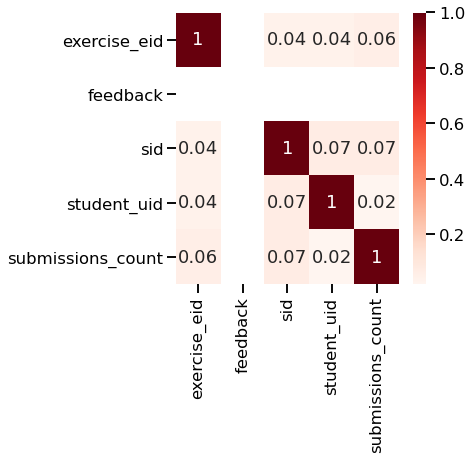

In [6]:
correlations = df_mumuki.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(5,5))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

## Caracterización

Estas son algunas preguntas que pueden ayudarnos a entrar al lote de datos y caracterizarlo: 

* ¿Qué tamaño tiene?
* ¿Qué valores únicos hay en cada columna?
* ¿Durante qué período se enviaron las soluciones? ¿En qué dias de la semana?
* ¿Cómo son las soluciones? ¿Cuántas soluciones únicas hay?
* ¿Cuántos ejercicios únicos tenemos?

In [7]:
print(f"El tamaño del lote de datos es: {df_mumuki.shape} (registros y columnas)")

El tamaño del lote de datos es: (47183, 13) (registros y columnas)


In [8]:
print(f"Hay {len(df_mumuki['exercise_eid'].value_counts())} valores unicos en exercise_eid")
print(f"Hay {len(df_mumuki['exercise_name'].value_counts())} valores unicos en exercise_name")

Hay 19 valores unicos en exercise_eid
Hay 46 valores unicos en exercise_name


In [9]:
df_mumuki['exercise_name'].unique()

array(['Funciones, declaración', 'Funciones, uso', 'Los premios',
       '¿Es par?', 'Libros de la buena memoria', 'Tipos de datos',
       'Booleanos', 'Más booleanos', 'El retorno del booleano',
       'Haciendo cuentas', 'Calefones', '¿Y qué tal si...?',
       '¿De qué signo sos?', 'Palabras, sólo palabras',
       'Operando strings', '¡GRITAR!', 'Probando funciones',
       'Poniendo topes', 'No tan distintos', 'Datos de todo tipo',
       'Comprando Hardware', '¿Me conviene?', 'Triangulos', 'Cuadrados',
       '¿Está afinado?', 'Cartelitos', 'Más Cartelitos',
       'Cartelitos óptimos', 'Cara o ceca', '¡Envido!',
       '¡Quiero retruco!', '¡Quiero vale cuatro!', '¿Está cerca?',
       '¿Y el program?', 'El círculo de la vida', 'Volviéndonos ricos',
       'Variables globales', '¿Y los procedimientos?', '¿Y el tablero?',
       'Impresión por pantalla', 'Martin Fierro', 'Conversiones',
       '¿Y esto cuánto vale?', 'PIenso que así es más fácil',
       'Pienso que así es más fá

In [10]:
print(f"Hay {len(df_mumuki['expectation_results'].value_counts())} valores unicos en expectation_results")
print(f"Hay {len(df_mumuki['feedback'].value_counts())} valores unicos en feedback")
print(f"Hay {len(df_mumuki['guide_slug'].value_counts())} valores unicos en guide_slug")

Hay 337 valores unicos en expectation_results
Hay 0 valores unicos en feedback
Hay 3 valores unicos en guide_slug


In [11]:
df_mumuki['guide_slug'].unique()

array(['mumukiproject/mumuki-guia-python-funciones-tipos-de-datos',
       'mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos',
       'mumukiproject/mumuki-guia-python-variables-y-procedimientos'],
      dtype=object)

In [12]:
print(f"Hay {len(df_mumuki['result'].value_counts())} valores unicos en result")
print(f"Hay {len(df_mumuki['sid'].value_counts())} valores unicos en sid")
print(f"Hay {len(df_mumuki['student_uid'].value_counts())} valores unicos en student_uid")
print(f"Hay {len(df_mumuki['submission_content'].value_counts())} valores unicos en submission_content")
print(f"Hay {len(df_mumuki['submission_created_at'].value_counts())} valores unicos en submission_created_at")
print(f"Hay {len(df_mumuki['submission_status'].value_counts())} valores unicos en submission_status")

Hay 9181 valores unicos en result
Hay 41676 valores unicos en sid
Hay 286 valores unicos en student_uid
Hay 32937 valores unicos en submission_content
Hay 47175 valores unicos en submission_created_at
Hay 6 valores unicos en submission_status


In [13]:
df_mumuki['submission_status'].unique()

array(['passed', 'failed', 'errored', 'passed_with_warnings', 'pending',
       'aborted'], dtype=object)

In [14]:
print(f"Hay {len(df_mumuki['submissions_count'].value_counts())} valores unicos en submissions_count")
print(f"Hay {len(df_mumuki['test_results'].value_counts())} valores unicos en test_results")

Hay 145 valores unicos en submissions_count
Hay 2780 valores unicos en test_results


In [15]:
print(f"El período que se enviaron las soluciones es desde: {df_mumuki['submission_created_at'].min()}  hasta: {df_mumuki['submission_created_at'].max()}")

El período que se enviaron las soluciones es desde: 2019-08-30 13:17:17.700  hasta: 2020-11-23 21:52:17.944


In [16]:
df_mumuki['Date']= pd.to_datetime(df_mumuki['submission_created_at']).dt.date
df_mumuki['Time']= pd.to_datetime(df_mumuki['submission_created_at']).dt.time
df_mumuki['Hora'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.hour

<AxesSubplot:xlabel='Date', ylabel='Count'>

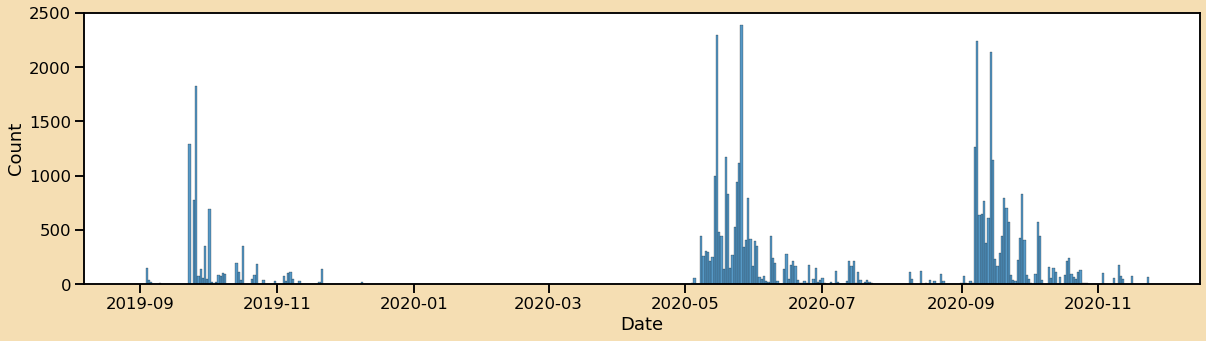

In [17]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot(data=df_mumuki, x=df_mumuki['Date'])

Podemos observar que los ejercicios los ejercicios realizados por los estudiantes se da en 3 periodos principales:
* 2019-10 al 2019-12
* 2020-05 al 2020-07
* 2020-09 al 2020-11

Hay un periodo de principio de enero 2020 a abril 2020 sin información.

In [18]:
df_mumuki['Year'] = pd.DatetimeIndex(df_mumuki['submission_created_at']).year
df_mumuki['Month'] = pd.DatetimeIndex(df_mumuki['submission_created_at']).month
df_mumuki['Periodo'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.to_period("M")

In [19]:
df_mumuki['DayNameWeek'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.day_name()
df_mumuki['DayWeek'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.weekday
df_mumuki['Week'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.week

<ipython-input-19-11dd87c504a0>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_mumuki['Week'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.week


In [20]:
df_mumuki.sort_values('DayWeek')

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,...,test_results,Date,Time,Hora,Year,Month,Periodo,DayNameWeek,DayWeek,Week
47182,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,353,NaN,2020-11-23 21:46:55.629,...,NaN,2020-11-23,21:46:55.629000,21,2020,11,2020-11,Monday,0,48
14986,13,"Palabras, sólo palabras",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 8\n def es_fin_d...",11751,231,"def es_fin_de_semana(""sábado"") :\r\n retur...",2020-06-01 23:56:30.807,...,[],2020-06-01,23:56:30.807000,23,2020,6,2020-06,Monday,0,23
39141,2,El círculo de la vida,"[{'binding': '*', 'inspection': 'DeclaresFunct...",NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,35041,216,def perimetro_circulo (string):\r\n return (3...,2020-06-01 23:25:43.651,...,[{'title': 'El perimetro de un circulo de radi...,2020-06-01,23:25:43.651000,23,2020,6,2020-06,Monday,0,23
39114,2,El círculo de la vida,"[{'binding': '*', 'inspection': 'DeclaresFunct...",NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,35014,178,def perimetro_circulo(radio):\r\n return (3.1...,2020-06-01 15:53:07.629,...,[{'title': 'El area de un circulo de radio 0 e...,2020-06-01,15:53:07.629000,15,2020,6,2020-06,Monday,0,23
39113,2,El círculo de la vida,"[{'binding': '*', 'inspection': 'DeclaresFunct...",NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,35013,178,def perimetro_circulo(radio):\r\n return (3.1...,2020-06-01 15:52:50.149,...,[{'title': 'El perimetro de un circulo de radi...,2020-06-01,15:52:50.149000,15,2020,6,2020-06,Monday,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37777,13,¿Está cerca?,[],NaN,mumukiproject/mumuki-guia-python-practica-func...,NaN,33677,151,def esta_cerca(frecuencia):\r\n if (frecuenci...,2020-05-17 18:58:21.768,...,"[{'title': 'Esta cerca 437', 'status': 'passed...",2020-05-17,18:58:21.768000,18,2020,5,2020-05,Sunday,6,20
37776,13,¿Está cerca?,[],NaN,mumukiproject/mumuki-guia-python-practica-func...,NaN,33676,151,def esta_cerca(frecuencia):\r\n return (frecu...,2020-05-17 18:57:18.616,...,"[{'title': 'Esta cerca 437', 'status': 'passed...",2020-05-17,18:57:18.616000,18,2020,5,2020-05,Sunday,6,20
37775,13,¿Está cerca?,[],NaN,mumukiproject/mumuki-guia-python-practica-func...,NaN,33675,151,def esta_cerca(frecuencia):\r\n return (frecu...,2020-05-17 18:57:09.982,...,"[{'title': 'Esta cerca 437', 'status': 'passed...",2020-05-17,18:57:09.982000,18,2020,5,2020-05,Sunday,6,20
37893,13,¿Está cerca?,[],NaN,mumukiproject/mumuki-guia-python-practica-func...,NaN,33793,197,def esta_cerca(numero):\r\n return numero>=...,2020-05-24 19:58:28.846,...,"[{'title': 'No esta cerca 420', 'status': 'pas...",2020-05-24,19:58:28.846000,19,2020,5,2020-05,Sunday,6,21


<AxesSubplot:xlabel='DayNameWeek', ylabel='Count'>

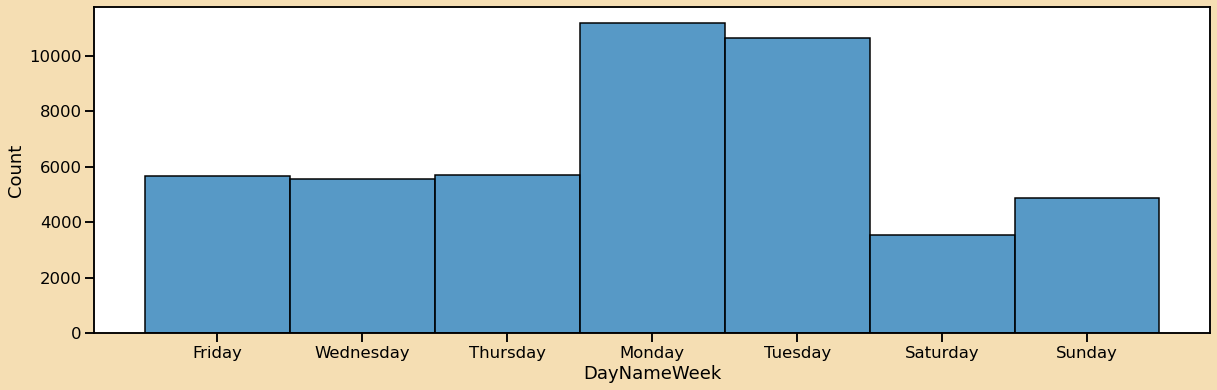

In [21]:
matplotlib.pyplot.figure(figsize = [20, 6] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot( x=df_mumuki['DayNameWeek'],data=df_mumuki.sort_values('DayWeek'))

*El día de la semana que más ejercicios presenta es el Lunes y Martes. El Sabado es el día de la semana que menos ejercicios presentan.*

In [22]:
#¿Cómo son las soluciones? ¿Cuántas soluciones únicas hay?

In [23]:
print(f"Hay {len(df_mumuki['exercise_name'].value_counts())} valores unicos en exercise_name")

Hay 46 valores unicos en exercise_name


In [24]:
#matplotlib.pyplot.figure(figsize = [15, 10] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
#ax= seaborn.barplot(y=df_mumuki['exercise_name'].value_counts(), x=df_mumuki['exercise_name'].value_counts().index, data=df_mumuki)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

*Unimos los ejercicos en dos status paso o no paso*

In [25]:
df_mumuki["status"] = df_mumuki["submission_status"].replace({"failed": "no_paso", "passed": "paso", "errored": "no_paso", "passed_with_warnings": "no_paso"})

In [26]:
df_mumuki["status"].value_counts()

no_paso    33652
paso       13519
pending        9
aborted        3
Name: status, dtype: int64

*Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes*

In [27]:
df_isna = df_mumuki.isna().sum()
df_isna.sort_values(ascending=False)

feedback                 47183
result                   31581
submission_content        5724
test_results              5520
status                       0
submission_status            0
exercise_name                0
expectation_results          0
guide_slug                   0
sid                          0
student_uid                  0
submission_created_at        0
submissions_count            0
Week                         0
Date                         0
Time                         0
Hora                         0
Year                         0
Month                        0
Periodo                      0
DayNameWeek                  0
DayWeek                      0
exercise_eid                 0
dtype: int64

*Detectamos que no hay identificador ni nombre de ejercicos nulos.
 Detectamos que no hay identificador de estudiantes nulos.
 Los campos result, submission_content y test_results de acuerdo al significado puede darse que vengan nulos.
 Los campos de la columna Feedback no tiene datos, esta todos nulos, por la cual decidimos eliminarlo.*

In [28]:
df_student1 = df_mumuki[df_mumuki["student_uid"]==-1]

In [29]:
df_student1.describe(include='all')

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,...,Date,Time,Hora,Year,Month,Periodo,DayNameWeek,DayWeek,Week,status
count,72.000000,72,72,0.0,72,3,72.000000,72.0,57,72,...,72,72,72.00000,72.0,72.0,72,72,72.000000,72.0,72
unique,NaN,30,21,NaN,2,3,NaN,NaN,57,72,...,3,72,NaN,NaN,NaN,1,3,NaN,NaN,2
top,NaN,No tan distintos,[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 9\n return numer...",NaN,NaN,def valor_canto_truco (canto):\r\n if canto =...,2020-07-15 16:35:45.540,...,2020-07-17,00:05:41.401000,NaN,NaN,NaN,2020-07,Friday,NaN,NaN,paso
freq,NaN,8,38,NaN,51,1,NaN,NaN,1,1,...,33,1,NaN,NaN,NaN,72,33,NaN,NaN,41
mean,9.791667,NaN,NaN,NaN,NaN,NaN,13958.597222,-1.0,NaN,NaN,...,NaN,NaN,9.50000,2020.0,7.0,NaN,NaN,3.041667,29.0,NaN
std,5.621732,NaN,NaN,NaN,NaN,NaN,11187.868704,0.0,NaN,NaN,...,NaN,NaN,9.03826,0.0,0.0,NaN,NaN,0.941044,0.0,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.0,NaN,NaN,...,NaN,NaN,0.00000,2020.0,7.0,NaN,NaN,2.000000,29.0,NaN
25%,5.000000,NaN,NaN,NaN,NaN,NaN,1786.750000,-1.0,NaN,NaN,...,NaN,NaN,0.00000,2020.0,7.0,NaN,NaN,2.000000,29.0,NaN
50%,9.500000,NaN,NaN,NaN,NaN,NaN,15921.500000,-1.0,NaN,NaN,...,NaN,NaN,16.00000,2020.0,7.0,NaN,NaN,3.000000,29.0,NaN
75%,15.000000,NaN,NaN,NaN,NaN,NaN,22257.250000,-1.0,NaN,NaN,...,NaN,NaN,16.00000,2020.0,7.0,NaN,NaN,4.000000,29.0,NaN


*En la descripción de formulas por columnas detectamos que tenemos identificado a un estudiante con id -1. Que tiene 72 ejercicios enviados*

In [30]:
df_student1[:3]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,...,Date,Time,Hora,Year,Month,Periodo,DayNameWeek,DayWeek,Week,status
762,1,"Funciones, declaración","[{'binding': '*', 'inspection': 'Declares:mita...",NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,762,-1,def doble(numero):\r\n return 2 / numero,2020-07-15 16:21:15.806,...,2020-07-15,16:21:15.806000,16,2020,7,2020-07,Wednesday,2,29,no_paso
763,1,"Funciones, declaración","[{'binding': '*', 'inspection': 'Declares:mita...",NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,763,-1,def mitad(numero):\r\n return 2 / numero,2020-07-15 16:21:37.508,...,2020-07-15,16:21:37.508000,16,2020,7,2020-07,Wednesday,2,29,no_paso
764,1,"Funciones, declaración","[{'binding': '*', 'inspection': 'Declares:mita...",NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,764,-1,def mitad(numero):\r\n return numero / 2,2020-07-15 16:22:00.640,...,2020-07-15,16:22:00.640000,16,2020,7,2020-07,Wednesday,2,29,paso


In [31]:
#analisis del estudiante identifica con -1
#df_student1.groupby(['guide_slug','exercise_eid','exercise_name','submission_status']).agg({'sid':'count','submission_created_at':'max'})

In [32]:
def display_blox_plots(df, columns , displayGraph ,scale = False   ):

    row_idx = 0
    col_idx = 0 
    
    columns_count = len (columns)
    
    if (columns_count == 1):
        
        fig, axes = plt.subplots(1, 1 , figsize=(18, 10))
        displayGraph.display(df = df, column = columns[0] , ax_x =  axes )    
  
    elif (columns_count == 2):
        
        fig, axes = plt.subplots(1, 2 , figsize=(18, 10))
        for column in columns:
            displayGraph.display(df = df, column = column , ax_x = axes[col_idx] ) 
            col_idx = col_idx + 1
    else:
        # Se debe hacer de manera automatica el calculo de figsize
        fig, axes = plt.subplots(int(math.ceil(len(columns) / 2 )), 2 , figsize=(18, 8 * int(math.ceil(len(columns) / 2 ))))
        
        for column in columns:
            displayGraph.display(df = df, column = column , ax_x = axes[row_idx][col_idx] ) 
            col_idx = col_idx + 1
            if (col_idx == 2):
                col_idx = 0 
                row_idx = row_idx + 1

In [33]:
class CustomPlot:
    scale = 1
    
    def setScale(self, scale):
        self.scale = scale
        
class CustomBoxPlot(CustomPlot):
   
    
    def __init__(self, scale = 1):
        print("Se corre el constructor")
        self.scale = scale
        
    def display(self, column , ax_x, df):
        
        column_max_value = df[column].max()
        if (self.scale == 1):
            seaborn.boxplot(ax = ax_x ,  data=df[column], orient='h')
        else:    
            seaborn.boxplot(ax = ax_x ,  data=df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]  , orient='h')
        
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)


class CustomHistPlot(CustomPlot):
    
    def __init__(self, scale = 1):
        self.scale = scale
        
    def display(self, column, ax_x, df):
        column_max_value = df[column].max()
            
        if (self.scale == 1):
            seaborn.histplot(ax = ax_x , data =  df[column] ) 
        else:    
            seaborn.histplot(ax = ax_x , data= df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]   ) 
         
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)
        

class CustomDistPlot(CustomPlot):
    
    def __init__(self ,plot):
        self.plot = plot 
        
    def display(self, column, ax_x, df):
        column_max_value = df[column].max()
            
        mean_value = df[column].mean()
        median_value = df[column].median()
        std_value = df[column].std()

        
        if (self.scale == 1):
            seaborn.distplot(a = df[column] ,ax = ax_x )
            
        else:    
            seaborn.distplot(a  = df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]    ,ax = ax_x )
        
        self.plot.draw()
        
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)
        ax_x.axvline(mean_value, color='r', linestyle='-')
        ax_x.axvline(median_value, color='g', linestyle='-')

# Frecuencia de acceso a la app

## Cantidad envios por día

<AxesSubplot:xlabel='Date', ylabel='Count'>

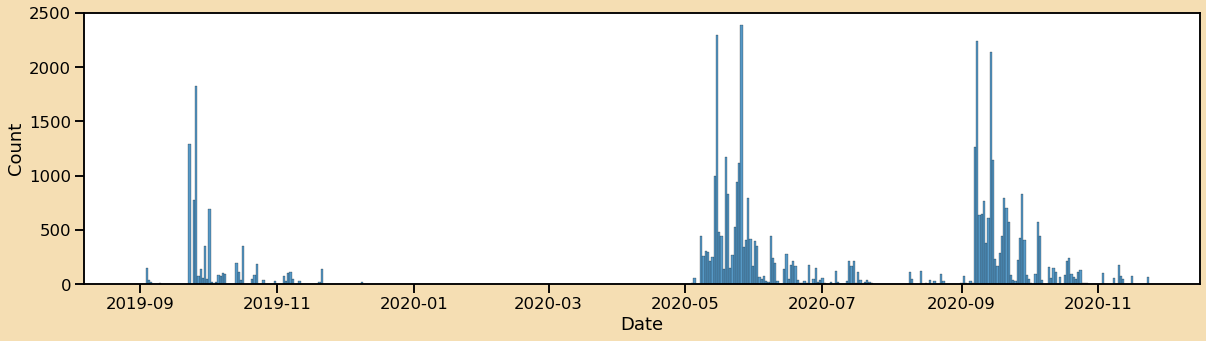

In [34]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot(data=df_mumuki, x=df_mumuki['Date'])

**Agrupacion por periodo, cuenta la cantidad de envios, cantidad de ejercicios y cantidad de estudiantes por periodo.**

In [35]:
df_Periodo=df_mumuki.groupby(['Year','Month','Periodo'], as_index=False).agg({'exercise_eid':'count','exercise_name': (lambda x: len(set(x))),'student_uid': (lambda x: len(set(x)))})

In [36]:
df_Periodo

,Year,Month,Periodo,exercise_eid,exercise_name,student_uid
0,2019,8,2019-08,2,2,1
1,2019,9,2019-09,4746,41,54
2,2019,10,2019-10,2263,40,45
3,2019,11,2019-11,580,40,11
4,2019,12,2019-12,23,7,1
5,2020,5,2020-05,15732,42,98
6,2020,6,2020-06,3507,42,62
7,2020,7,2020-07,1126,42,35
8,2020,8,2020-08,494,42,5
9,2020,9,2020-09,15305,42,94


<AxesSubplot:xlabel='Periodo', ylabel='exercise_eid'>

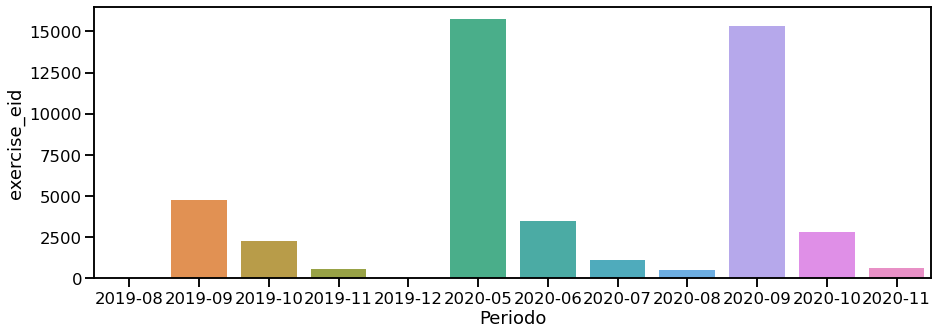

In [37]:
fig, axes = plt.subplots(1, 1 , figsize=(15, 5))
seaborn.barplot(x="Periodo", y="exercise_eid", data=df_Periodo.sort_values('Periodo'))

<AxesSubplot:xlabel='Periodo', ylabel='exercise_name'>

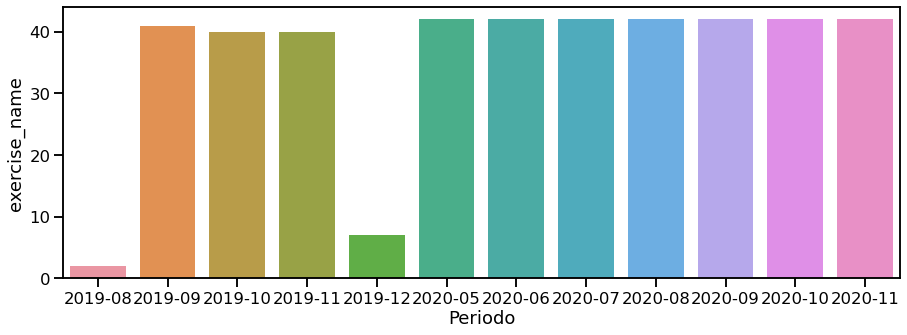

In [38]:
fig, axes = plt.subplots(1, 1 , figsize=(15, 5))
seaborn.barplot(x="Periodo", y="exercise_name", data=df_Periodo.sort_values('Periodo'))

<AxesSubplot:xlabel='Periodo', ylabel='student_uid'>

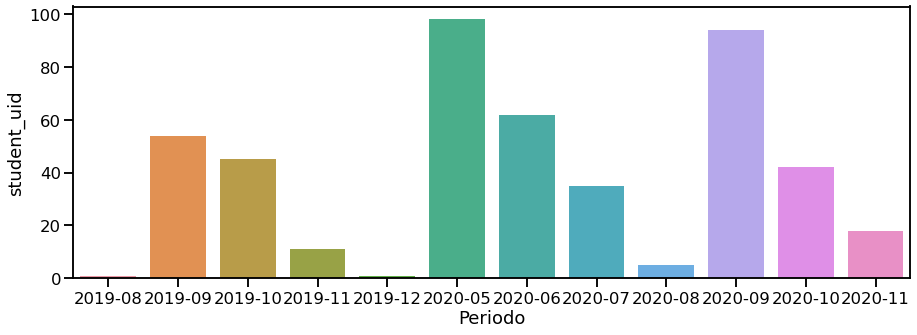

In [39]:
fig, axes = plt.subplots(1, 1 , figsize=(15, 5))
seaborn.barplot(x="Periodo", y="student_uid", data=df_Periodo.sort_values('Periodo'))

**Agrupacion por semana, cuenta la cantidad de envios, de ejercicios y de estudiantes por semana.**

In [40]:
df_week=df_mumuki.groupby(['Year','Week'], as_index=False).agg({'exercise_eid':'count','exercise_name': (lambda x: len(set(x))),'student_uid': (lambda x: len(set(x)))})

In [41]:
df_week

,Year,Week,exercise_eid,exercise_name,student_uid
0,2019,35,2,2,1
1,2019,36,218,28,3
2,2019,37,14,5,1
3,2019,39,4166,41,50
4,2019,40,1223,40,25
5,2019,41,280,33,7
6,2019,42,703,40,18
7,2019,43,373,40,11
8,2019,44,37,14,7
9,2019,45,376,40,7


**Agrupacion por estudiante, cuenta la cantidad de envios, de ejericios y de dias por estudiante.** 

In [68]:
df_student = df_mumuki.groupby(['student_uid'], as_index=False).agg({'exercise_eid':'count','exercise_name': (lambda x: len(set(x))),'Date': (lambda x: len(set(x)))})

In [77]:
df_student.sort_values(by=['exercise_name'],ascending = True)

,student_uid,exercise_eid,exercise_name,Date
1,75,1,1,1
283,361,1,1,1
284,362,3,1,1
57,131,6,1,1
69,143,3,1,1
...,...,...,...,...
159,233,338,42,1
160,234,111,42,1
166,240,95,42,2
150,224,227,42,8


In [97]:
df_student.describe()

,student_uid,exercise_eid,exercise_name,Date
count,286.000000,286.000000,286.000000,286.000000
mean,216.304196,164.975524,32.534965,4.188811
std,83.389648,108.342000,13.938354,2.515778
min,-1.000000,1.000000,1.000000,1.000000
25%,145.250000,85.250000,23.000000,2.000000
50%,216.500000,148.500000,42.000000,4.000000
75%,287.750000,222.750000,42.000000,6.000000
max,363.000000,660.000000,42.000000,15.000000


<AxesSubplot:xlabel='exercise_name', ylabel='Count'>

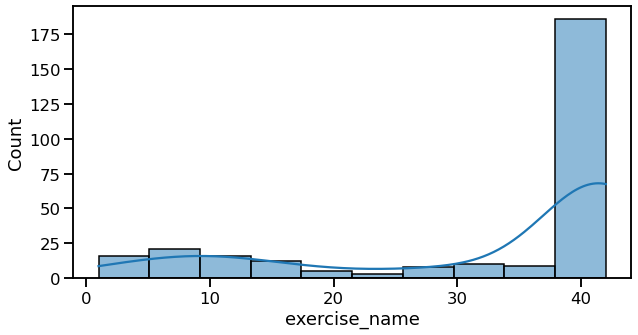

In [79]:
plt.figure(figsize=(10, 5))
seaborn.histplot(df_student['exercise_name'] , kde=True)

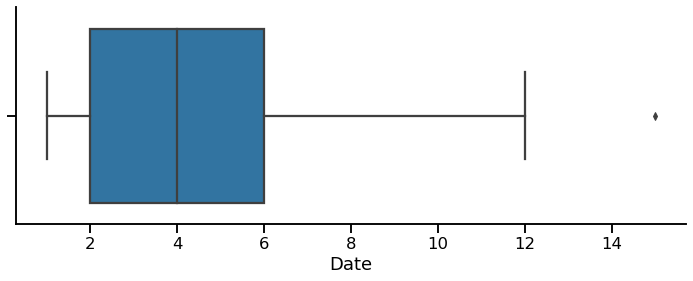

In [71]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_student['Date'])
seaborn.despine()

<AxesSubplot:xlabel='Date', ylabel='Count'>

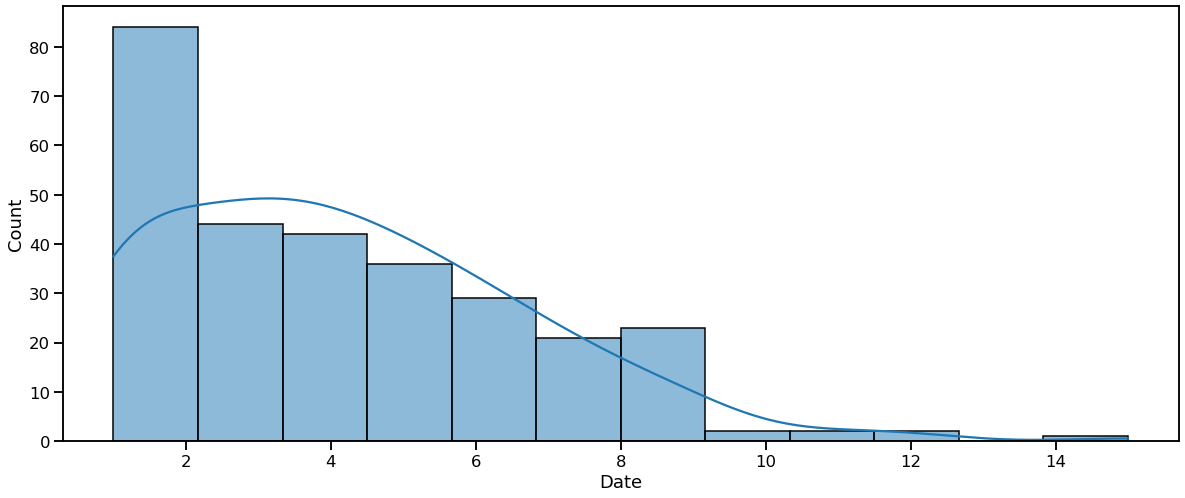

In [45]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df_student['Date'] , kde=True)

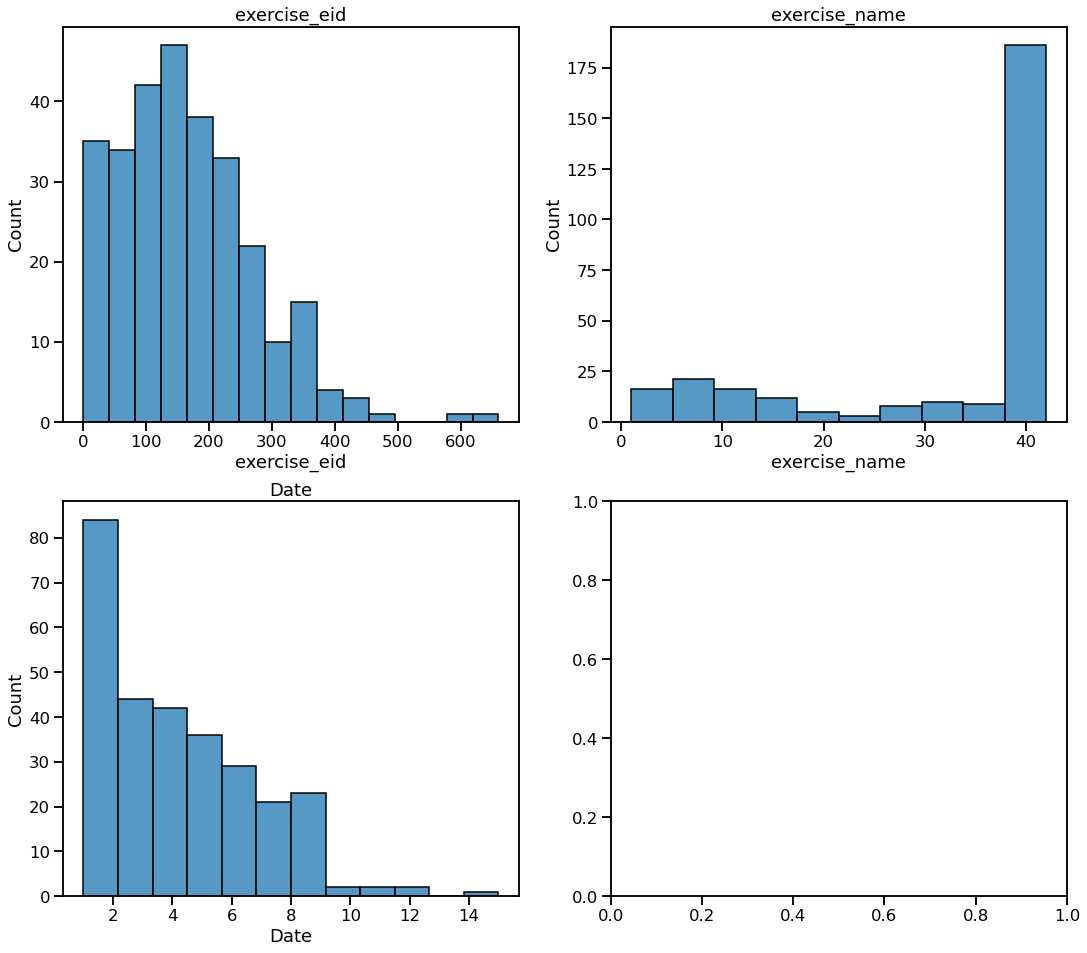

In [46]:
customHistPlot = CustomHistPlot(1000)

columns_to_plot = df_student.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_student , columns= columns_to_plot , displayGraph= customHistPlot)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

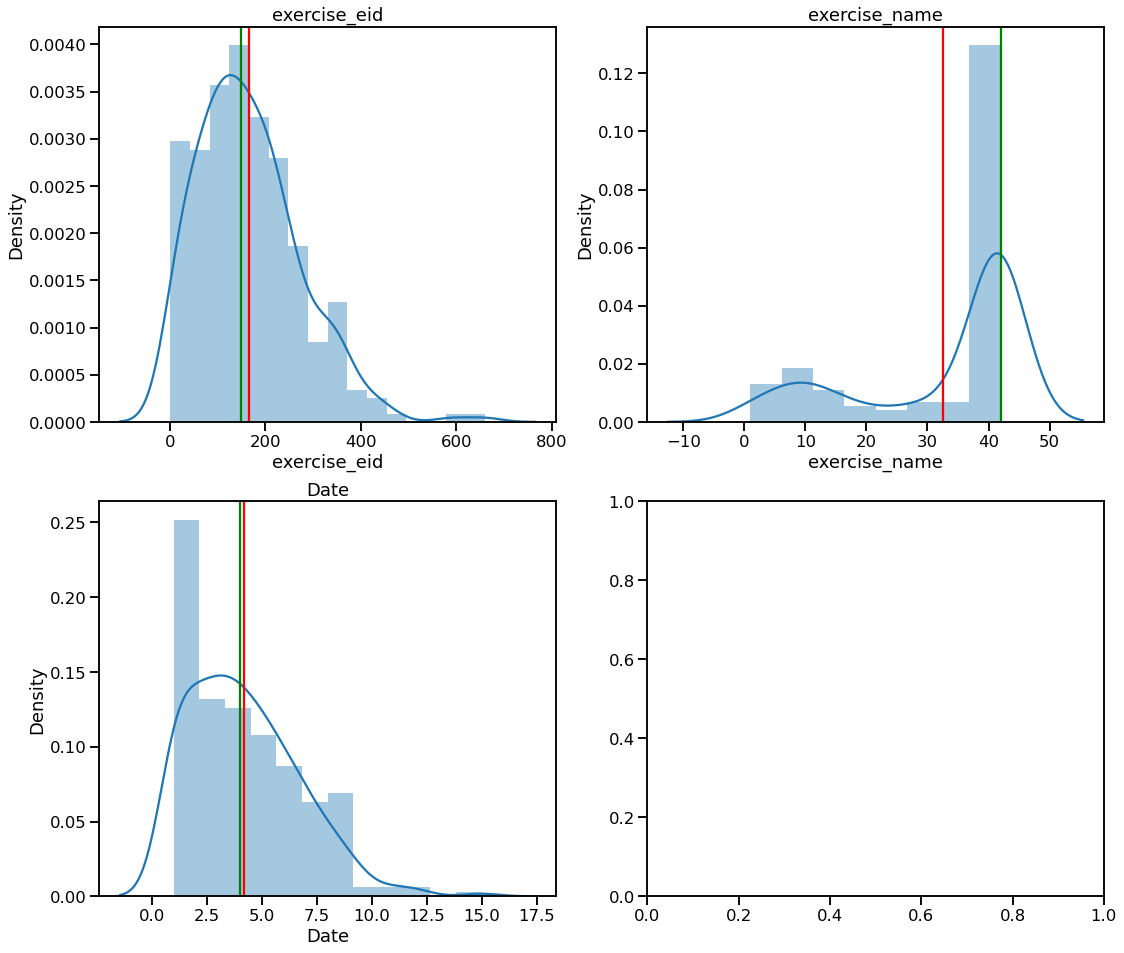

In [47]:
customDistPlot = CustomDistPlot(plt)
customDistPlot.setScale(1)
columns_to_plot = df_student.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_student , columns= columns_to_plot , displayGraph= customDistPlot)

**Tiempo entre un ejercico y el otro en dias.**

In [48]:
df_order=df_mumuki[['student_uid','guide_slug', 'exercise_name', 'status','submission_created_at']].sort_values(by=['student_uid','submission_created_at'],ascending = True)

In [49]:
df_order['prev_value'] = df_order['submission_created_at'].shift().where(df_order.student_uid.eq(df_order.student_uid.shift()))

In [50]:
df_order[:]

,student_uid,guide_slug,exercise_name,status,submission_created_at,prev_value
22309,-1,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,no_paso,2020-07-15 16:19:06.872,NaN
22310,-1,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,no_paso,2020-07-15 16:19:41.159,2020-07-15 16:19:06.872
22311,-1,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,no_paso,2020-07-15 16:19:44.444,2020-07-15 16:19:41.159
22312,-1,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,no_paso,2020-07-15 16:19:47.470,2020-07-15 16:19:44.444
22313,-1,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,no_paso,2020-07-15 16:19:49.408,2020-07-15 16:19:47.470
...,...,...,...,...,...,...
33972,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:08.643,2020-10-06 14:44:05.235
33973,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:27.866,2020-10-06 14:45:08.643
33974,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:35.999,2020-10-06 14:45:27.866
33975,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:54.872,2020-10-06 14:45:35.999


In [51]:
df_order['differ'] = (pd.to_datetime(df_order['submission_created_at'])-pd.to_datetime(df_order['prev_value'])).dt.days

In [52]:
#df_order['differ_min'] = (pd.to_datetime(df_order['submission_created_at'])-pd.to_datetime(df_order['prev_value']))
#df_order['differ_m'] = (pd.to_datetime(df_order['submission_created_at'])-pd.to_datetime(df_order['prev_value']))/numpy.timedelta64(1,'m')

In [53]:
df_order.sort_values(by=['differ'],ascending = False)

,student_uid,guide_slug,exercise_name,status,submission_created_at,prev_value,differ
5001,97,mumukiproject/mumuki-guia-python-funciones-tip...,Tipos de datos,paso,2020-09-18 20:04:05.989,2019-10-23 11:49:33.276,331.0
22308,250,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,paso,2020-10-12 17:17:17.822,2020-07-21 14:40:41.377,83.0
45298,355,mumukiproject/mumuki-guia-python-variables-y-p...,Conversiones,no_paso,2020-08-03 19:40:07.416,2020-05-26 14:44:42.028,69.0
22335,260,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,paso,2020-11-23 20:15:28.657,2020-09-19 17:00:28.418,65.0
2139,319,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, uso",no_paso,2020-11-16 03:31:16.822,2020-09-23 00:31:53.947,54.0
...,...,...,...,...,...,...,...
16903,358,mumukiproject/mumuki-guia-python-funciones-tip...,Operando strings,no_paso,2020-05-16 18:49:13.480,NaN,NaN
22173,359,mumukiproject/mumuki-guia-python-funciones-tip...,No tan distintos,paso,2020-05-14 22:42:31.975,NaN,NaN
25026,361,mumukiproject/mumuki-guia-python-practica-func...,¿Me conviene?,no_paso,2019-10-17 12:52:42.552,NaN,NaN
26904,362,mumukiproject/mumuki-guia-python-practica-func...,Triangulos,no_paso,2019-10-17 14:35:27.705,NaN,NaN


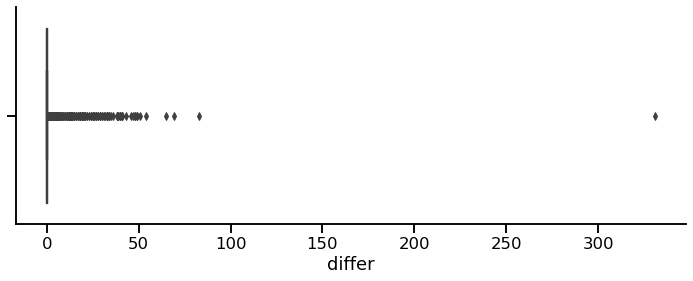

In [54]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_order['differ'])
seaborn.despine()

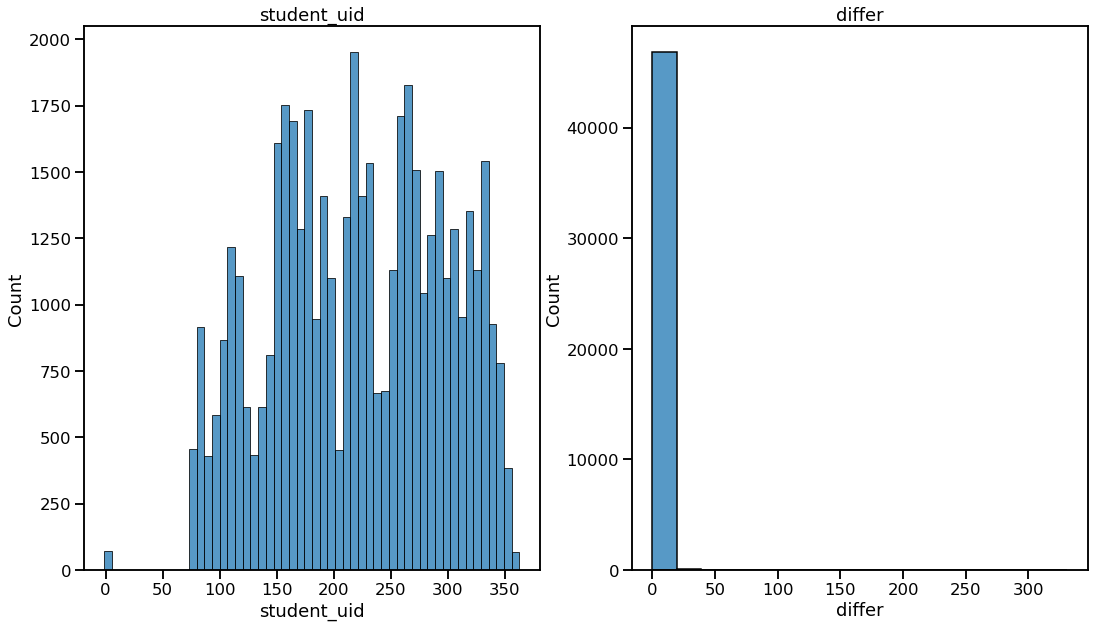

In [55]:
customHistPlot = CustomHistPlot(1000)

columns_to_plot = df_order.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_order , columns= columns_to_plot , displayGraph= customHistPlot)

**Tiempo entre ejercicio y ejercicio por estudiante**

In [98]:
df_byExercise = df_mumuki.groupby(['student_uid','exercise_name'], as_index=False).agg({'submission_created_at':'max','exercise_eid':'count'}).sort_values(by=['student_uid','submission_created_at'],ascending = True)

In [99]:
df_byExercise

,student_uid,exercise_name,submission_created_at,exercise_eid
14,-1,No tan distintos,2020-07-15 16:20:33.827,8
8,-1,"Funciones, declaración",2020-07-15 16:22:00.640,3
9,-1,"Funciones, uso",2020-07-15 16:25:48.109,2
18,-1,Probando funciones,2020-07-15 16:36:14.413,3
10,-1,Haciendo cuentas,2020-07-15 16:38:41.638,7
...,...,...,...,...
9300,361,¿Me conviene?,2019-10-17 12:52:42.552,1
9301,362,Triangulos,2019-10-17 14:36:54.224,3
9302,363,Cartelitos,2020-10-06 14:17:51.060,3
9304,363,Más Cartelitos,2020-10-06 14:27:26.752,4


In [100]:
df_byExercise['prev_value_E'] = df_byExercise['submission_created_at'].shift().where(df_byExercise.student_uid.eq(df_byExercise.student_uid.shift()))

In [101]:
df_byExercise

,student_uid,exercise_name,submission_created_at,exercise_eid,prev_value_E
14,-1,No tan distintos,2020-07-15 16:20:33.827,8,NaN
8,-1,"Funciones, declaración",2020-07-15 16:22:00.640,3,2020-07-15 16:20:33.827
9,-1,"Funciones, uso",2020-07-15 16:25:48.109,2,2020-07-15 16:22:00.640
18,-1,Probando funciones,2020-07-15 16:36:14.413,3,2020-07-15 16:25:48.109
10,-1,Haciendo cuentas,2020-07-15 16:38:41.638,7,2020-07-15 16:36:14.413
...,...,...,...,...,...
9300,361,¿Me conviene?,2019-10-17 12:52:42.552,1,NaN
9301,362,Triangulos,2019-10-17 14:36:54.224,3,NaN
9302,363,Cartelitos,2020-10-06 14:17:51.060,3,NaN
9304,363,Más Cartelitos,2020-10-06 14:27:26.752,4,2020-10-06 14:17:51.060


In [102]:
df_byExercise['differ_E'] = (pd.to_datetime(df_byExercise['submission_created_at'])-pd.to_datetime(df_byExercise['prev_value_E'])).dt.days

In [103]:
df_byExercise.sort_values(by=['differ_E'],ascending = False)

,student_uid,exercise_name,submission_created_at,exercise_eid,prev_value_E,differ_E
428,97,Tipos de datos,2020-09-18 20:05:03.146,11,2019-10-23 11:49:33.276,331.0
5384,250,No tan distintos,2020-10-12 17:17:17.822,2,2020-07-21 14:40:41.377,83.0
9279,355,Conversiones,2020-08-03 19:40:07.416,1,2020-05-26 14:44:42.028,69.0
5762,260,No tan distintos,2020-11-23 20:15:28.657,3,2020-09-19 17:00:28.418,65.0
8135,319,"Funciones, uso",2020-11-21 15:17:26.661,35,2020-09-23 00:31:53.947,59.0
...,...,...,...,...,...,...
9283,358,Operando strings,2020-05-16 18:50:49.407,6,NaN,NaN
9292,359,No tan distintos,2020-05-14 22:42:31.975,1,NaN,NaN
9300,361,¿Me conviene?,2019-10-17 12:52:42.552,1,NaN,NaN
9301,362,Triangulos,2019-10-17 14:36:54.224,3,NaN,NaN


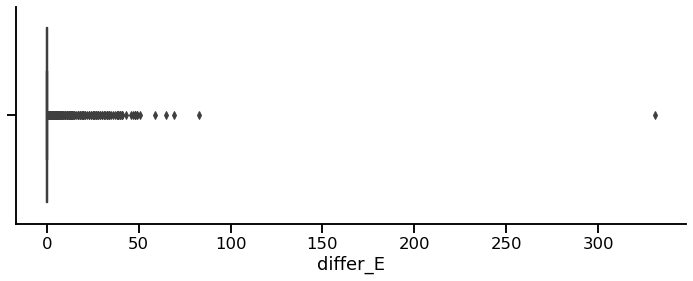

In [104]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_byExercise['differ_E'])
seaborn.despine()

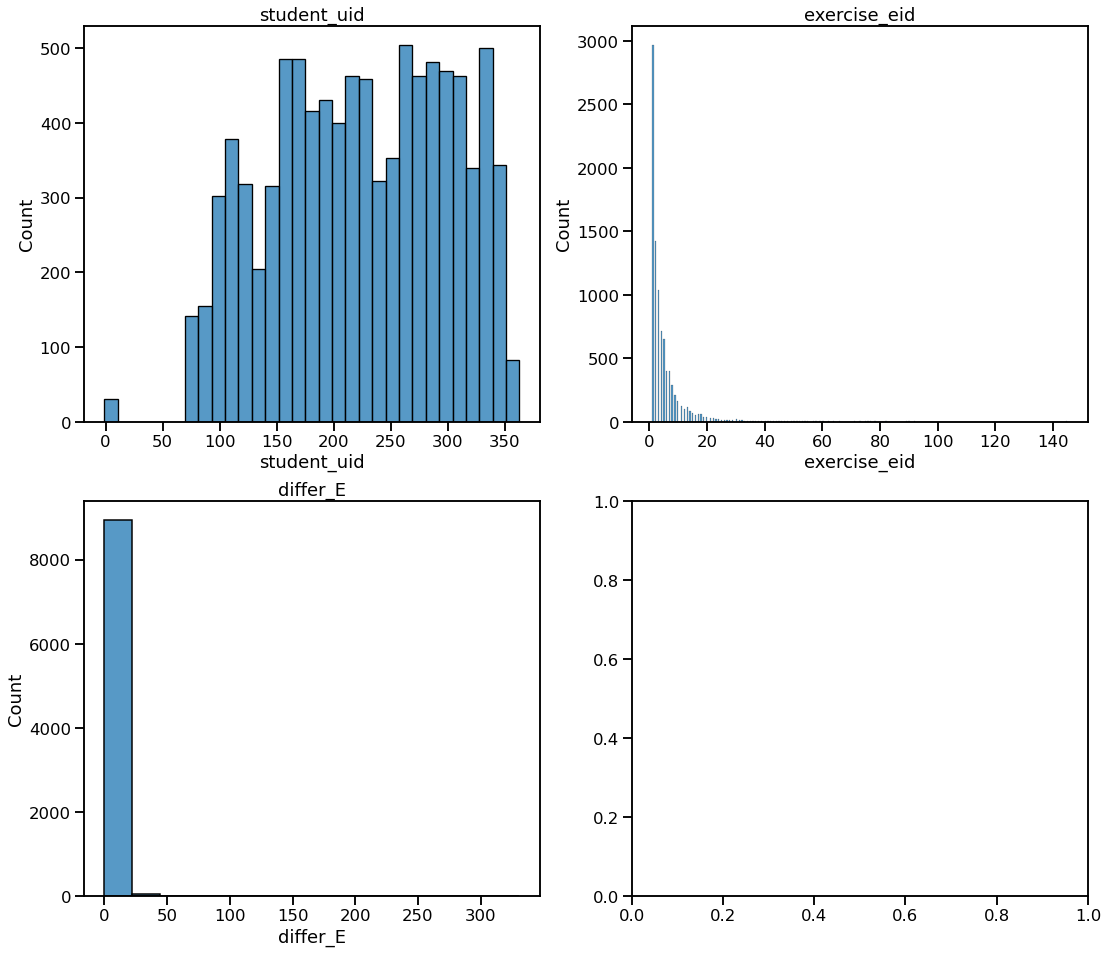

In [105]:
customHistPlot = CustomHistPlot(1000)

columns_to_plot = df_byExercise.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_byExercise , columns= columns_to_plot , displayGraph= customHistPlot)

In [108]:
df_promedio_por_ej_por_std=df_mumuki.groupby('student_uid').status.value_counts() \
  .unstack(fill_value=0).reset_index()

In [110]:
#Contador de ejercicios unicos por user_id
df_promedio_por_ej_por_std['total_exerc']=[ no_paso+paso for no_paso,paso,student_uid  in zip(df_promedio_por_ej_por_std['no_paso'],df_promedio_por_ej_por_std['paso'],df_promedio_por_ej_por_std['student_uid'])]

In [112]:
df_promedio_por_ej_por_std['grupo_submission_status']=[ 'no_paso' if no_paso>paso else 'paso' for no_paso,paso,student_uid in zip(df_promedio_por_ej_por_std['no_paso'],df_promedio_por_ej_por_std['paso'],df_promedio_por_ej_por_std['student_uid'])]

In [113]:
df_promedio_por_ej_por_std

status,student_uid,aborted,no_paso,paso,pending,total_exerc,grupo_submission_status
0,-1,0,31,41,0,72,paso
1,75,0,1,0,0,1,no_paso
2,76,0,42,47,0,89,paso
3,77,0,91,95,0,186,paso
4,78,0,69,15,0,84,no_paso
...,...,...,...,...,...,...,...
281,358,0,5,1,0,6,no_paso
282,359,0,19,19,0,38,paso
283,361,0,1,0,0,1,no_paso
284,362,0,3,0,0,3,no_paso


In [120]:
df_promedio_por_ej_por_std['grupo_submission_status'].value_counts()

no_paso    235
paso        51
Name: grupo_submission_status, dtype: int64